# Réseau de neurones et attrition des clients bancaires

Réseau de neurones avec Python (Keras)

## La problématique

On s'intéresse ici à une problème classique du domaine bancaire (mais pas que !) qui est l'attrition ou *churn* en anglais et correspond à la perte de client. 
Récemment de nombreux clients ont quitté la banque Crédit Friqué. La question est de comprendre pourquoi ces départs ? Ou plutôt de prédire s'ils vont partir...

## Les données

Pour répondre à cette question, la banque a sélectionné 6 mois plus tôt un sous ensemble de ses clients pour lesquels elle a stocké un certain nombre d’information puis, dans les 6 mois qui ont suivis, elle a observé si les clients avaient quitté ou non la banque. Vous voilà donc, 6 mois plus tard, contacté par la banque qui vous propose un beau dataset (pour une fois!) et vous demande de déterminer les profils des clients les plus à même de partir.
Vous disposez du fichier banque_abandon.csv qui est la base de données de la banque virtuelle Crédit Friqué.

## Quelques questions préliminaires

C'est juste pour vous échauffer donc ça doit être fait en moins d'une heure ça !
1. À quoi correspondent les différentes variables du datasets ?
2. Pour pas perdre les bonnes habitudes, faites quelques visualisations pour voir ce qu'il y a dans vos données.
3. À quelle type de problème avez-vous à faire ici : classification ou régression ?
>- Lister un certain nombre de modèles vous permettant de le résoudre
>- Lister les métriques associées à ce type de problème
>- Choisir un modèle, l'entraîner et l'évaluer avec la métrique de votre choix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# dataset
df = pd.read_csv('data/banque_abandon.csv')
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


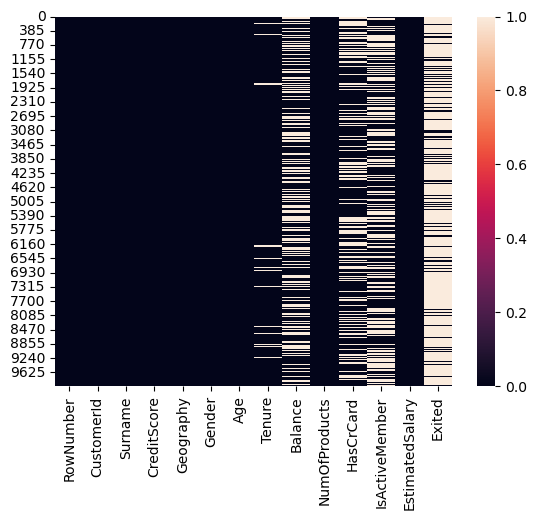

In [5]:
sns.heatmap(df==0);

In [6]:
np.mean(df.Exited)

0.2037

## Dans le vif du sujet

Vous l'aurez compris, il s'agit ici de résoudre le problème à l'aide d'un réseau de neurones.   
Vous aurez bien sûr besoin du package `keras` et il vous faudra aussi certainement installer `tensorflow`(et peut-être `theano` si besoin).  
À vous de jouer !
N'oubliez pas le preprocessing !

In [7]:
# création de X et y
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]
X.shape, y.shape

((10000, 10), (10000,))

In [8]:
# découpage train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [9]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
X.value_counts('Geography')

Geography
France     5014
Germany    2509
Spain      2477
dtype: int64

In [11]:
# pipeline de preprocessing
# onehotencoder pour les variables catégoriques
# standard scaler pour les variables numériques
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector

preprocessor = make_column_transformer(
    (OneHotEncoder(drop='first'), ['Geography', 'Gender']),
    (StandardScaler(), make_column_selector(dtype_exclude='object'))
)

X_train_pp = preprocessor.fit_transform(X_train)
X_test_pp = preprocessor.transform(X_test)
X_train_pp.shape, X_test_pp.shape

((8000, 11), (2000, 11))

In [12]:
# on passe à l'ANN
from keras.models import Sequential
from keras.layers import Dense

# architecture du réseau
mlp = Sequential()
mlp.add(Dense(input_dim=11, units=12, activation='relu'))
mlp.add(Dense(units=8, activation='relu'))
mlp.add(Dense(units=6, activation='relu'))
mlp.add(Dense(units=1, activation='sigmoid'))

# hyperparamètres d'apprentissage
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# entraînement
mlp.fit(X_train_pp, y_train, batch_size=32, epochs=100, validation_data=(X_test_pp, y_test))

2024-01-17 12:13:07.270911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


2024-01-17 12:13:08.637348: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


250/250 [==============================] - 1s 2ms/step - loss: 0.5234 - accuracy: 0.7629 - val_loss: 0.4619 - val_accuracy: 0.8000
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8040 - val_loss: 0.4245 - val_accuracy: 0.8060
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4042 - accuracy: 0.8232 - val_loss: 0.3911 - val_accuracy: 0.8360
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8451 - val_loss: 0.3638 - val_accuracy: 0.8520
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3569 - accuracy: 0.8543 - val_loss: 0.3518 - val_accuracy: 0.8520
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8565 - val_loss: 0.3498 - val_accuracy: 0.8495
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3423 - accuracy: 0.8581 - val_loss: 0.3449 - val_accuracy: 0.8515
Epoch 8/100

In [44]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [14]:
mlp.evaluate(X_test_pp, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8505


[0.3502129912376404, 0.8504999876022339]

In [15]:
y_pred = 1 * (mlp.predict(X_test_pp) > 0.5)

63/63 [==============================] - 0s 1ms/step


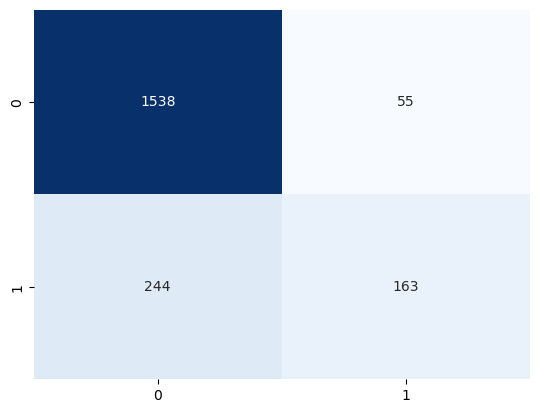

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False, cmap='Blues', fmt='d');

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1593
           1       0.75      0.40      0.52       407

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.72      2000
weighted avg       0.84      0.85      0.83      2000



## Amélioration du modèle via resampling

Les résultats n'étant pas très probants, on peut essayer d'améliorer le modèle via des téchniques de rééchantillonage pour compenser le fait que les classes soient un peu déséquilibrée (ce n'est pas très marqué dans ce cas précis mais ça reste utile de le voir).

Une technique majoritairement utilisée est SMOTE qui consiste à générer et ajouter des observations dans la classe minoritaire.

Éventuellement, si le déséquilibre des classes est très important, on peut combiner le sur-échantillonage (*oversampling*) de la classe minoritaire avec un sous-échantillonage aléatoire (*random undersampling*) de la classe majoritaire.

In [ ]:
### A FAIRE

## Évaluation du réseau et affinage des hyper-paramètres

Jusqu'à maintenant, on a évalué les réseaux qu'on a vu en regardant uniquement l'accuracy mais cette valeur n'est pas déterministe puisqu'elle dépend de certains paramètres aléatoires comme le train_test_split, l'intialisation des paramètres etc...

Une solution par rapport à ce problème est de répéter l'entraînement plusieurs fois et de regarder les résultats en moyenne. On l'a déjà utilisé et ça s'appelle la validation croisée.

Mettez en place la validation croisée en utilisant `cross_val_score` puis affiner les paramètres avec `GridSearchCV`.

__/!\\__ Vous aurez besoin de ce qu'on appelle un wrapper pour pouvoir relier `keras` à `sklearn` et utiliser un modèle de l'un dans l'autre. Ça tombe bien, ça existe : regarder la librairie `scikeras.wrappers`.

In [25]:
# définition d'une fonction pour instancier le modèle
def build_ann_clf(optimizer='adam'):
    clf = Sequential()
    clf.add(Dense(units=8, activation='relu', input_dim=11))
    clf.add(Dense(units=6, activation='relu'))
    clf.add(Dense(units=1, activation='sigmoid'))
    clf.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return clf

In [27]:
# création d'un wrapper pour utiliser le modèle keras dans sklearn
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
clf = KerasClassifier(model=build_ann_clf, batch_size=10, epochs=100)
acc = cross_val_score(estimator=clf, X=X_train_pp, y=y_train, cv=5, n_jobs=-1)
acc

2024-01-17 12:19:01.918837: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 12:19:01.942419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 12:19:01.954852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable th

Epoch 1/100


2024-01-17 12:19:04.594865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
Epoch 1/100


2024-01-17 12:19:05.004426: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-17 12:19:05.058487: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
Epoch 1/100
640/640 [==============================] - 2s 2ms/step - loss: 0.4973 - accuracy: 0.7823
Epoch 2/100
640/640 [==============================] - 2s 2ms/step - loss: 0.5894 - accuracy: 0.6950
Epoch 2/100
640/640 [==============================] - 2s 2ms/step - loss: 0.5046 - accuracy: 0.7770
Epoch 2/100
640/640 [==============================] - 2s 2ms/step - loss: 0.5374 - accuracy: 0.7177
Epoch 2/100
640/640 [==============================] - 2s 2ms/step - loss: 0.5076 - accuracy: 0.7811
Epoch 2/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4295 - accuracy: 0.8008
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4243 - accuracy: 0.8228
Epoch 3/100
640/640 [==============================] - 1s 2ms/step - loss: 0.4228 - accuracy: 0.8142
Epoch 3/100
640/640 [==============================] - 2s 2ms/step - loss: 0.4054 - accuracy: 0.8128
Epoch 4/100
640/640 [==============================] - 1s 2ms/step - loss: 0.39

array([0.85875 , 0.8625  , 0.859375, 0.864375, 0.856875])

In [28]:
acc.mean(), acc.std()

(0.860375, 0.002698379143115356)

In [ ]:
# affinage des hyperparamètres par validation croisée : GridSearchCV
from sklearn.model_selection import GridSearchCV
clf = KerasClassifier(model=build_ann_clf)

parametres = {
    'batch_size' : [16, 32],
    'epochs': [50, 120],
    'optimizer' : ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=clf, param_grid=parametres, scoring='accuracy', cv=5)
grid = grid.fit(X_train_pp, y_train, verbose=0)
grid.best_params_, grid.best_score_

In [ ]:
grid.best_estimator_.score(X_test_pp, y_test)

## Sauvegarde et chargement des réseaux

Regarder les méthodes `save` et `load_model` de la librairie `keras.models` pour la sauvegarde et le chargement des modèle. Quel format de fichier utiliser ?

Si vous souhaitez ne sauvegarder que l'architecture du modèle (sans les poids ni la configuration d'entraînement), vous pouvez utiliser `to_json`.

Enfin, pour ne sauvegarder que les poids, vous avez la méthode `save_weights`.

In [29]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


### model.save()

Cette fonction sauvegarde : 
- l'architecture du modèle : permet de le recréer si besoin
- les poids du modèle
- les paramètres d'apprentissage (loss, optimizer, metrics de l'étape `compile`)
- l'état de l'optimisation ce qui permet de reprendre l'apprentissage où on l'avait laissé

In [30]:
mlp.save('models/mlp_bank.h5')

### model.load_model()
charge un modèle enregistrés et l'ensemble des infos

In [31]:
from keras.models import load_model
new_model = load_model('models/mlp_bank.h5')

In [32]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [33]:
new_model.get_weights()[1], mlp.get_weights()[1]

(array([-0.07338906,  0.11071418,  0.4464077 , -0.06093422, -0.0696731 ,
         0.7932484 ,  0.09280672,  0.32271478, -0.29248407,  0.08179784,
         0.21503699,  0.3060662 ], dtype=float32),
 array([-0.07338906,  0.11071418,  0.4464077 , -0.06093422, -0.0696731 ,
         0.7932484 ,  0.09280672,  0.32271478, -0.29248407,  0.08179784,
         0.21503699,  0.3060662 ], dtype=float32))

In [34]:
new_model.optimizer, new_model.loss

(<keras.optimizers.optimizer_experimental.adam.Adam at 0x7f2eff20e9e0>,
 <function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>)

In [35]:
new_model.predict(X_test_pp)

63/63 [==============================] - 0s 919us/step


array([[0.06786656],
       [0.11973999],
       [0.02038068],
       ...,
       [0.00522138],
       [0.9996634 ],
       [0.07408586]], dtype=float32)

In [36]:
new_model.fit(X_test_pp, y_test, batch_size=20, epochs=5)

Epoch 1/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 0.8520
Epoch 2/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3468 - accuracy: 0.8550
Epoch 3/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8580
Epoch 4/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8635
Epoch 5/5
100/100 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8610


### model.to_json()

Si on a juste besoin de sauvegarder **la structure d'un réseau, sans ses paramètres d'apprentissage ni ses poids**, on peut utiliser les 2 fonctions suivantes (pour sauvegarder et charger).

In [37]:
# sauvegarde en json
json = mlp.to_json()
json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 11], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 11], "units": 12, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 8, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_

In [38]:
# reconstruire un modèle depuis une sauvegarde json
from keras.models import model_from_json
new_model2 = model_from_json(json)
new_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 6)                 54        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [39]:
new_model2.get_weights()

[array([[-0.40831864, -0.33541036,  0.27498072, -0.05016643,  0.0675357 ,
         -0.39825007,  0.33475518, -0.37613082,  0.17338061, -0.08147529,
         -0.12247854,  0.06741709],
        [ 0.4212711 , -0.47033143,  0.28409368, -0.26040912,  0.16047448,
         -0.1624853 , -0.20982268, -0.06730345,  0.45654136, -0.37401417,
          0.1853782 , -0.43690687],
        [ 0.20376569,  0.25068712, -0.040371  , -0.47779772,  0.12304646,
          0.30698228,  0.36637497,  0.14083183, -0.07420179, -0.00253677,
         -0.07684207, -0.3207592 ],
        [-0.18534249, -0.5073993 , -0.4779179 , -0.44750637,  0.06012273,
         -0.05046758,  0.04971004,  0.07557684, -0.11172816, -0.1169588 ,
         -0.4031009 ,  0.0463078 ],
        [ 0.25004548, -0.30518854,  0.35143107,  0.13259655,  0.03291678,
          0.2780878 , -0.20101923, -0.41877106,  0.12047547,  0.25284237,
          0.3403631 ,  0.22994608],
        [ 0.3042062 , -0.42715272, -0.3808061 , -0.2298617 , -0.44004864,
      

In [40]:
print(new_model2.optimizer)

None


### model.save_weights()

Si jamais, on veut uniquement les poids d'un modèle.

In [41]:
mlp.save_weights('models/mes_poids.h5')

In [43]:
new_model3 = Sequential([
    Dense(input_dim=11, units=12, activation='relu'),
    Dense(units=8, activation='relu'),
    Dense(units=6, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

new_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                144       
                                                                 
 dense_8 (Dense)             (None, 8)                 104       
                                                                 
 dense_9 (Dense)             (None, 6)                 54        
                                                                 
 dense_10 (Dense)            (None, 1)                 7         
                                                                 
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [45]:
# poids initialisés par défaut
new_model3.get_weights()

[array([[ 0.21559072,  0.28623104, -0.48189685, -0.16205496,  0.10648251,
          0.24715275,  0.11330402, -0.33103502, -0.23792893,  0.16062194,
          0.2889105 , -0.23972252],
        [-0.30371678,  0.07563663,  0.10232103, -0.0028882 , -0.41555554,
         -0.49630445,  0.08060986, -0.49669984, -0.23907408, -0.01577583,
         -0.29307526,  0.16051   ],
        [-0.25841215, -0.4872366 , -0.20125377,  0.22911012, -0.3018936 ,
          0.50161165,  0.11215341,  0.44376975,  0.07085437,  0.17110455,
         -0.21066451, -0.04468638],
        [ 0.2094379 ,  0.42682564, -0.38961673, -0.2610869 , -0.21924257,
         -0.05233958,  0.38973302,  0.28877157,  0.0582422 , -0.44053596,
         -0.06123292, -0.15980336],
        [ 0.42279947,  0.15829557,  0.3546241 , -0.13185227, -0.01681677,
         -0.0137516 ,  0.03943223,  0.11025727,  0.2914878 , -0.39598888,
         -0.40718532,  0.36133438],
        [ 0.0119406 , -0.19339281,  0.34712458, -0.21793717, -0.43495375,
      

In [46]:
# chargement des poids sauvegardés
new_model3.load_weights('models/mes_poids.h5')
new_model3.get_weights()

[array([[ 0.31149316,  0.8738772 , -0.6099201 , -0.3927553 , -0.12982355,
         -0.61505383, -0.31023297, -0.37443832, -0.1117999 ,  0.20785624,
          0.4542791 , -0.76075333],
        [-0.39752898,  0.26805022,  0.49453327,  0.40669817, -0.6826332 ,
         -0.07212142,  0.08525822,  0.06844214, -0.15129475, -0.02902561,
         -0.4032772 ,  0.2210217 ],
        [-0.05515415, -0.09383014,  0.5438555 ,  0.18435252, -0.12511644,
          0.49554932, -0.03893202,  0.6045929 , -0.00198024, -0.02248016,
         -0.33551267,  0.02430101],
        [ 0.04092321, -0.04377514,  0.04927093,  0.00352005,  0.32075462,
         -0.19835487, -0.04912436,  0.24773583,  0.08215123, -0.13014889,
          0.1328827 , -0.28860998],
        [ 1.0607488 ,  0.0471989 , -0.38643596,  0.7445689 ,  0.7315348 ,
         -0.3051959 ,  0.10334988, -0.84376186, -0.45660028,  0.4123941 ,
         -0.28595525, -0.15927798],
        [-0.01904048, -0.26059812, -0.22366692, -0.1421348 , -0.10483622,
      

## Complément sur l'overfitting

Toujours sur les données de la banque, entrainer un réseau ayant une structure complexe avec beaucoup de neurones et de couches afin de générer une situation d'overfitting.  
Comparer l'accuracy sur les échantillons train et test pour confirmer le cas de sur-apprentissage.

Reprendre le même réseau en utilisant des layers `Dropout` pour réduire ce problème.  
Comparer à nouveau l'accuracy pour voir l'effet des `Dropout` sur l'overfitting.

Une autre méthode pour limiter le sur-apprentissage est la régularisation. Est-il possible d'en faire avec un réseau de neurones ? Si oui, allez-y

In [50]:
mlp_overfit = Sequential([
    Dense(units=128, activation='relu', input_dim=11),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=16, activation='relu'),
    Dense(units=4, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

mlp_overfit.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_overfit.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1536      
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 4)                 68        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 12,473
Trainable params: 12,473
Non-trai

In [51]:
mlp_overfit.fit(X_train_pp, y_train, epochs=100, batch_size=16)

Epoch 1/100
500/500 [==============================] - 2s 1ms/step - loss: 0.4008 - accuracy: 0.8329
Epoch 2/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3498 - accuracy: 0.8540
Epoch 3/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3391 - accuracy: 0.8585
Epoch 4/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3357 - accuracy: 0.8626
Epoch 5/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3310 - accuracy: 0.8637
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3272 - accuracy: 0.8659
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8683
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3208 - accuracy: 0.8660
Epoch 9/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3149 - accuracy: 0.8711
Epoch 10/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3146 - accura

In [52]:
print(mlp_overfit.evaluate(X_train_pp, y_train), mlp_overfit.evaluate(X_test_pp, y_test))

63/63 [==============================] - 0s 1ms/step - loss: 1.4028 - accuracy: 0.8250
[0.04272375628352165, 0.984000027179718] [1.402822494506836, 0.824999988079071]


In [53]:
# ANN - avec DropOut
from keras.layers import Dropout

mlp_overfit_dropout = Sequential([
    Dense(units=128, activation='relu', input_dim=11),
    Dropout(0.3),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=32, activation='relu'),
    Dropout(0.3),
    Dense(units=16, activation='relu'),
    Dropout(0.3),
    Dense(units=4, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])

mlp_overfit_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_overfit_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 128)               1536      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_24 (Dense)            (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_26 (Dense)            (None, 16)               

In [54]:
mlp_overfit_dropout.fit(X_train_pp, y_train, epochs=100, batch_size=10)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.5055 - accuracy: 0.7900
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.8061
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4203 - accuracy: 0.8207
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4081 - accuracy: 0.8269
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8345
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3966 - accuracy: 0.8376
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8378
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3856 - accuracy: 0.8428
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8420
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3786 - accura

In [55]:
mlp_overfit_dropout.evaluate(X_train_pp, y_train)
mlp_overfit_dropout.evaluate(X_test_pp, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3642 - accuracy: 0.8555


[0.36415401101112366, 0.8554999828338623]

In [56]:
# ANN - avec régularisation l2
from keras import regularizers

mlp_overfit_regul = Sequential([
    Dense(units=128, activation='relu', input_dim=11),
    Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),#ou kernel_regularizer='l2'
    Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=4, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=1, activation='sigmoid')
])

mlp_overfit_regul.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

mlp_overfit_regul.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 128)               1536      
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 4)                 68        
                                                                 
 dense_34 (Dense)            (None, 1)                 5         
                                                                 
Total params: 12,473
Trainable params: 12,473
Non-trai

In [57]:
mlp_overfit_regul.fit(X_train_pp, y_train, epochs=100, batch_size=10)

Epoch 1/100
800/800 [==============================] - 2s 1ms/step - loss: 0.6576 - accuracy: 0.8059
Epoch 2/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.8459
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4158 - accuracy: 0.8543
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4052 - accuracy: 0.8540
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8583
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3946 - accuracy: 0.8572
Epoch 7/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3890 - accuracy: 0.8574
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3880 - accuracy: 0.8575
Epoch 9/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3835 - accuracy: 0.8596
Epoch 10/100
800/800 [==============================] - 1s 1ms/step - loss: 0.3816 - accura

In [58]:
mlp_overfit_regul.evaluate(X_train_pp, y_train)
mlp_overfit_regul.evaluate(X_test_pp, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8550


[0.37335583567619324, 0.8550000190734863]